# **Diabetes Prediction**


In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv("diabetes.csv")

# Exploring the dataset

In [3]:
# Returns number of rows and columns of the dataset
df.shape

(2000, 9)

In [4]:
# Returns an object with all of the column headers
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [7]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [8]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [9]:
# Returns true for a column having null values, else false
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [10]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [11]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

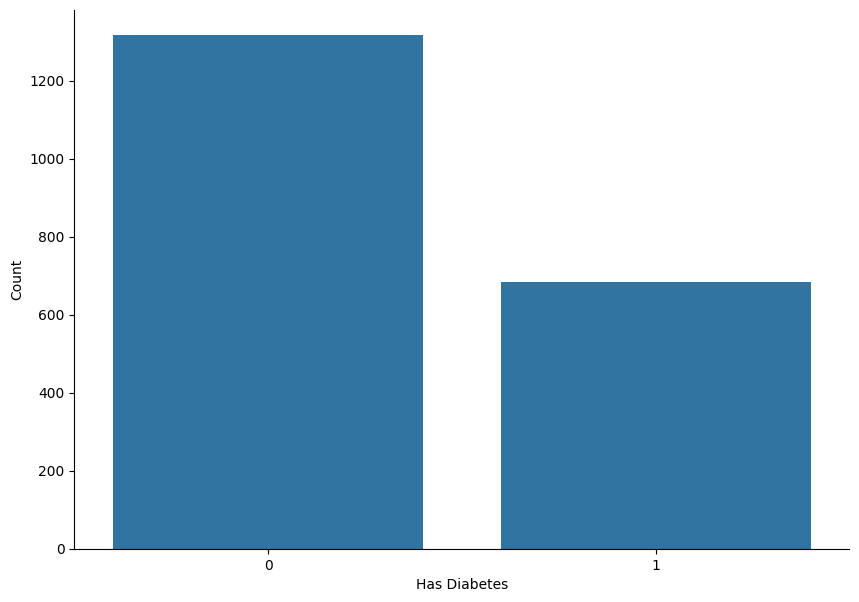

In [12]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

# Data Cleaning

In [13]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

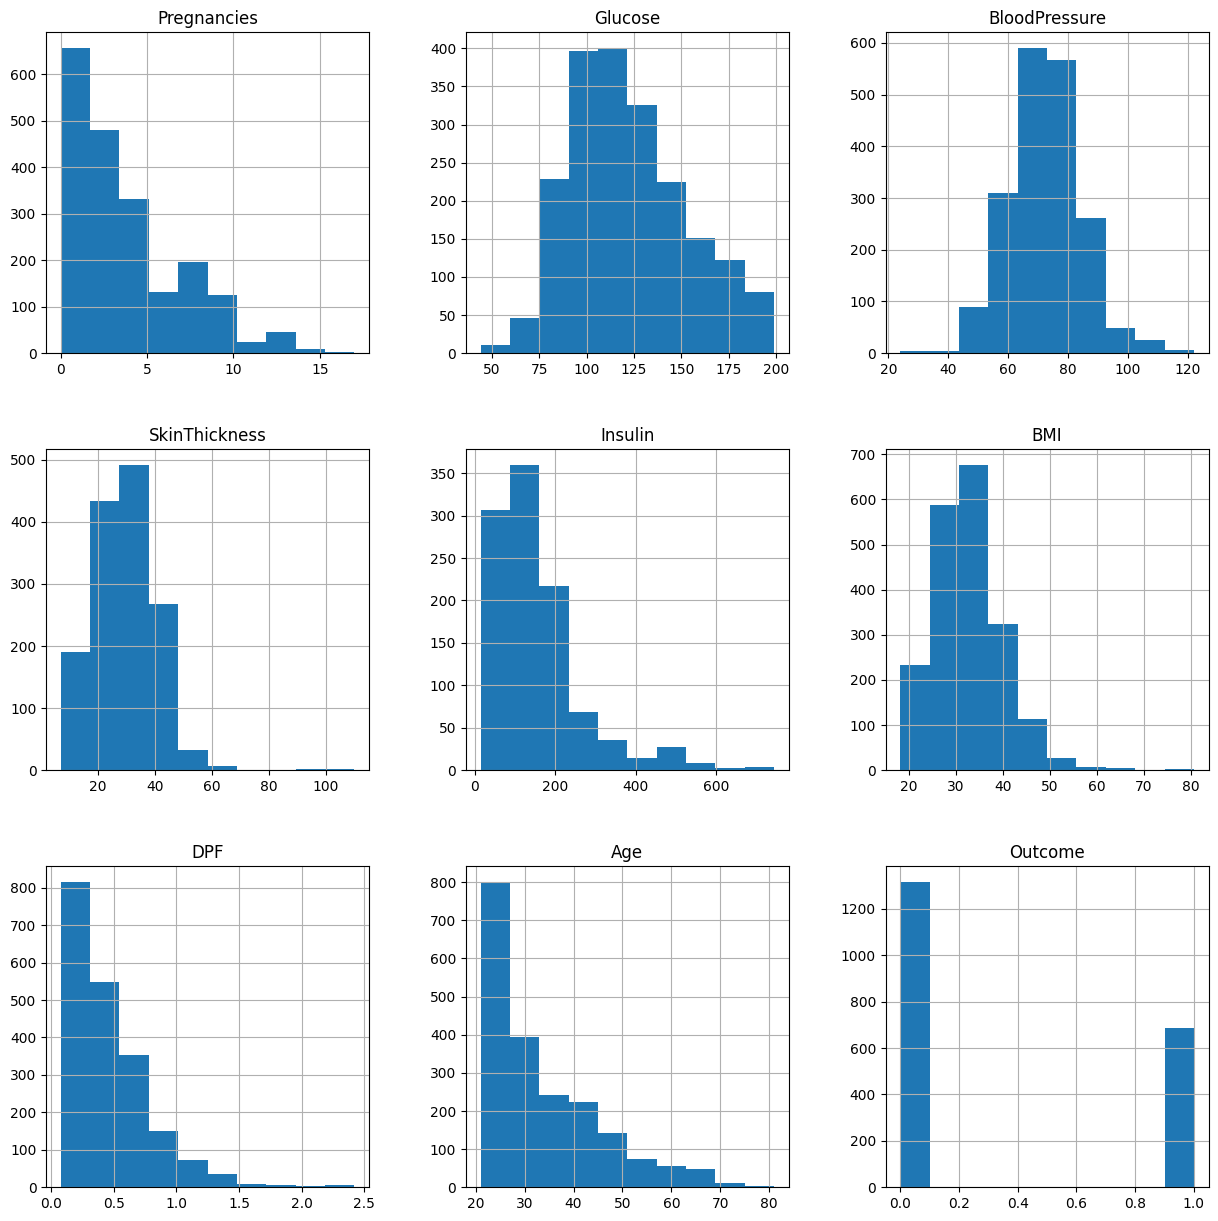

In [14]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df_copy.hist(figsize = (15,15))

In [15]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_16776\587404965.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_16776\587404965.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

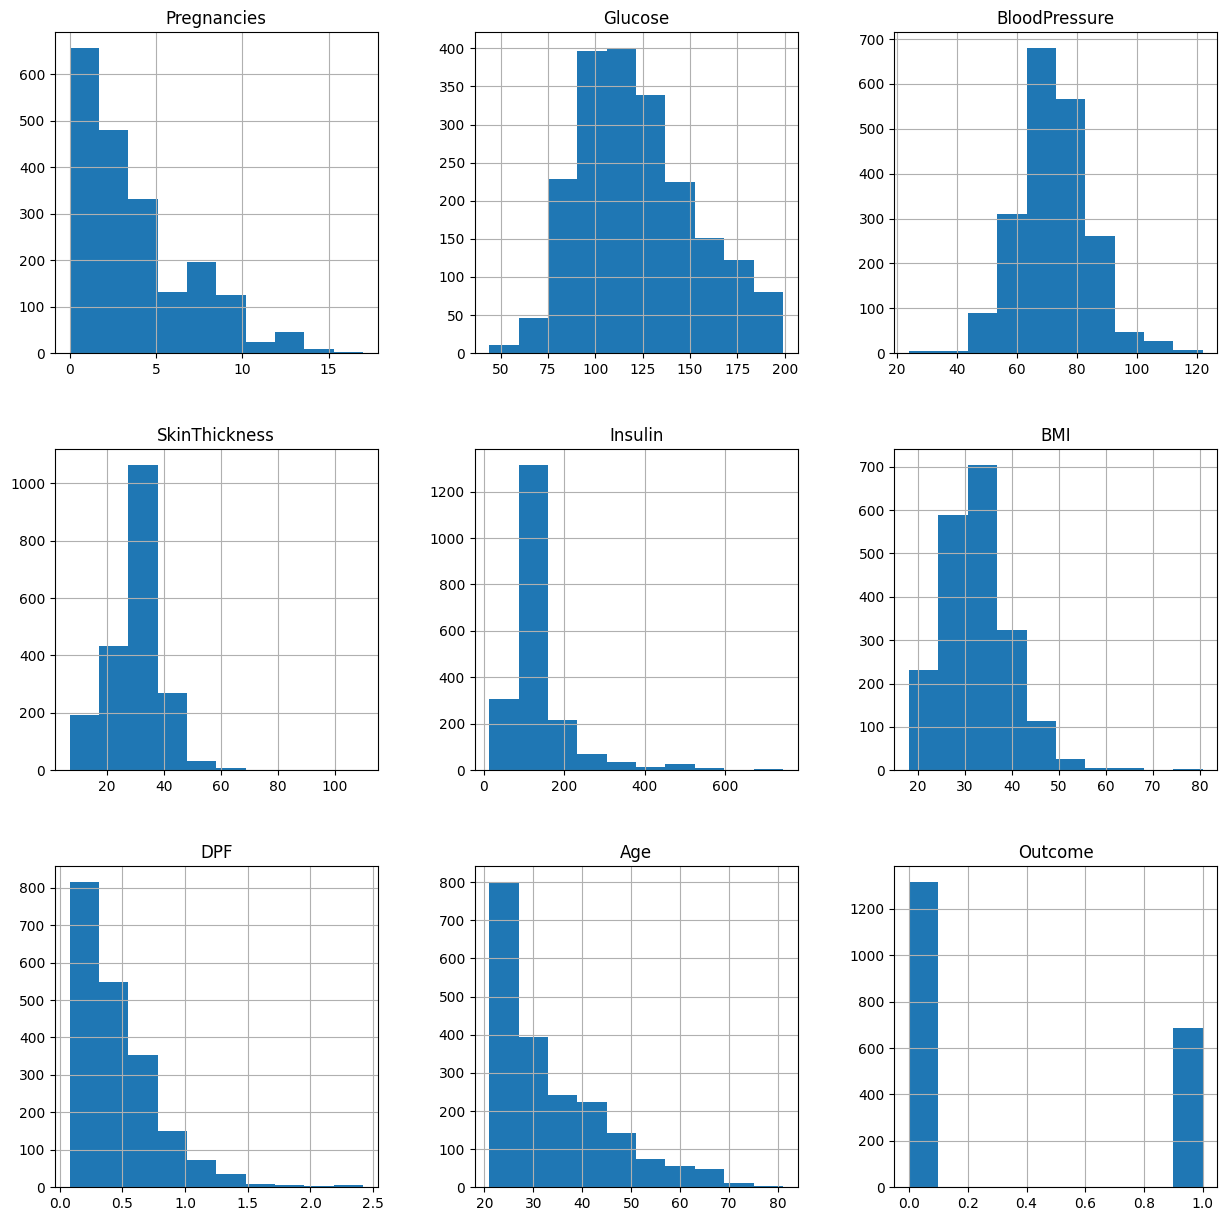

In [16]:
# Plotting histogram of dataset after replacing NaN values
p = df_copy.hist(figsize=(15,15))

In [17]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

# Model Building

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [21]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },

        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },

        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },

        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }

    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })

    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1

,model,best_parameters,score
0,logistic_regression,{'C': 5},0.763125
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.904375
2,random_forest,{'n_estimators': 20},0.951875
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.869375


*Note: Since the Random Forest algorithm has the highest accuracy, we futher fine tune the model using hyperparameter optimization.*

In [22]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 95%


In [23]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

# Model Evaluation

In [24]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[272,   0],
       [  5, 123]])

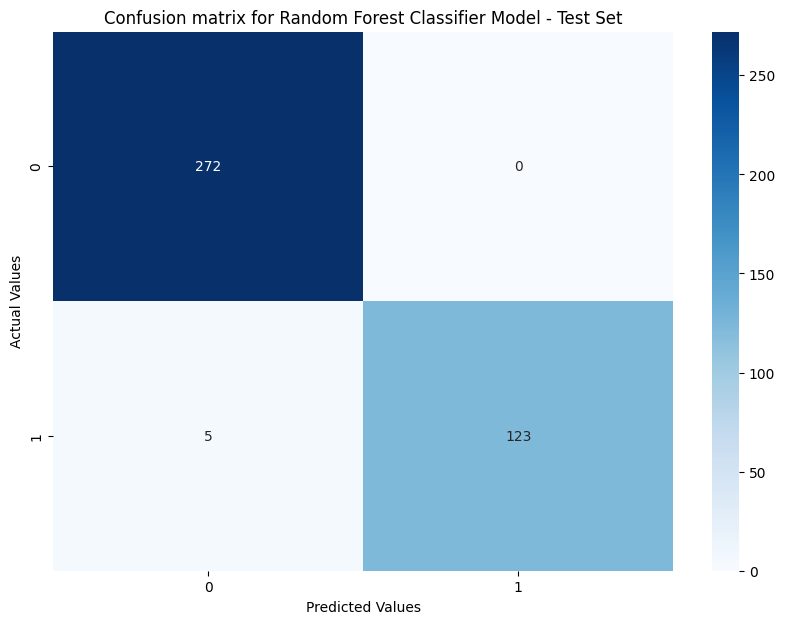

In [25]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [26]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 98.75%


In [27]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       272
           1       1.00      0.96      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.99       400
weighted avg       0.99      0.99      0.99       400



In [28]:
# Creating a confusion matrix for training set
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[1044,    0],
       [   1,  555]])

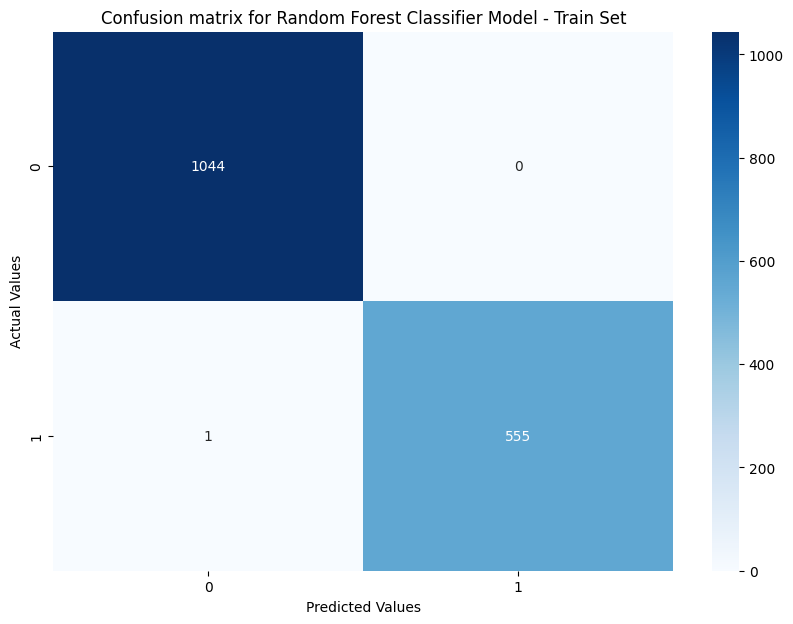

In [29]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [30]:
# Accuracy Score
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 99.94%


In [31]:
# Classification Report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       556

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
import joblib

# Save both the model and the scaler
joblib.dump({'model': classifier, 'scaler': sc}, 'diabetes_model_with_scaler.joblib')

['diabetes_model_with_scaler.joblib']

**how to use ?**

In [33]:
import joblib

# Load the model and scaler
saved_data = joblib.load('diabetes_model_with_scaler.joblib')
loaded_model = saved_data['model']
sc = saved_data['scaler']

In [34]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age,model,sc):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return model.predict(x)


In [35]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25,loaded_model,sc)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(5, 180, 88, 24, 145, 34.5, 0.403, 60,loaded_model,sc)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Oops! You have diabetes.


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
# Prediction 3
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 80, 92, 10, 81, 26.1, 0.551, 33,loaded_model,sc)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
# Load both datasets from the pipe-delimited text files
file_path_1 = r"E:\ai and data science\nariman1\CGM.txt"
file_path_2 = r"E:\ai and data science\nariman1\MonitorCGM.txt"

# Load the data using the correct delimiter ('|')
data_1 = pd.read_csv(file_path_1, sep="|")  # Use pipe delimiter
data_2 = pd.read_csv(file_path_2, sep="|")


In [39]:
# Load the data again, explicitly specifying the delimiter and any additional arguments
data_1= pd.read_csv('E:/ai and data science/nariman1/CGM.txt', delimiter='|', dtype={'DeidentID': str, 'RecID': str})
data_2= pd.read_csv('E:/ai and data science/nariman1/MonitorCGM.txt', delimiter='|', dtype={'DeidentID': str, 'RecID': str})

# Check if the data has been loaded correctly
data_1.head()



,DeidentID,RecID,InternalTime,CGM,DisplayTime,DisplayTimeAdjusted
0,1,1,2013-09-30 00:36:48,194,2013-09-29 17:36:48,NaN
1,1,2,2013-09-30 00:41:48,204,2013-09-29 17:41:48,NaN
2,1,3,2013-09-30 00:46:48,201,2013-09-29 17:46:48,NaN
3,1,4,2013-09-30 00:51:48,204,2013-09-29 17:51:48,NaN
4,1,5,2013-09-30 00:56:48,200,2013-09-29 17:56:48,NaN


In [40]:
# Drop the 'LocalDtTmAdjusted' column
data_2 = data_2.drop(columns='LocalDtTmAdjusted')
print(data_2.head())
data_2.to_csv('E:/ai and data science/nariman1/cleaned_monitorCGM_updated.csv', index=False)

data_1= data_1.drop(columns='DisplayTimeAdjusted')
print(data_1.head())
data_1.to_csv('E:/ai and data science/nariman1/cleaned_CGM_updated.csv', index=False)


  DeidentID  RecID            LocalDtTm  CGM
0         2  61300  2013-12-17 11:06:33   93
1         2  61301  2013-12-17 11:01:33   93
2         2  61302  2013-12-17 10:56:33   93
3         2  61303  2013-12-17 10:51:33   93
4         2  61304  2013-12-17 10:46:33   94
  DeidentID RecID         InternalTime  CGM          DisplayTime
0         1     1  2013-09-30 00:36:48  194  2013-09-29 17:36:48
1         1     2  2013-09-30 00:41:48  204  2013-09-29 17:41:48
2         1     3  2013-09-30 00:46:48  201  2013-09-29 17:46:48
3         1     4  2013-09-30 00:51:48  204  2013-09-29 17:51:48
4         1     5  2013-09-30 00:56:48  200  2013-09-29 17:56:48


In [41]:
# Combine the datasets vertically (assuming they have the same columns)
combined_data = pd.concat([data_1, data_2], ignore_index=True)

# Check the combined dataset
print(combined_data.head())

# Save the combined dataset to a new CSV file
combined_data.to_csv('E:/ai and data science/nariman1/combined_CGM_data.csv', index=False)

  DeidentID RecID         InternalTime  CGM          DisplayTime LocalDtTm
0         1     1  2013-09-30 00:36:48  194  2013-09-29 17:36:48       NaN
1         1     2  2013-09-30 00:41:48  204  2013-09-29 17:41:48       NaN
2         1     3  2013-09-30 00:46:48  201  2013-09-29 17:46:48       NaN
3         1     4  2013-09-30 00:51:48  204  2013-09-29 17:51:48       NaN
4         1     5  2013-09-30 00:56:48  200  2013-09-29 17:56:48       NaN


In [42]:
combined_data.isna().sum()

DeidentID             0
RecID                 0
InternalTime     931011
CGM                   0
DisplayTime      915827
LocalDtTm       1302636
dtype: int64

In [43]:
combined_data = combined_data.drop(columns=['LocalDtTm'])


In [44]:
# Use DisplayTime to fill in missing InternalTime
combined_data['InternalTime'] = combined_data['InternalTime'].fillna(combined_data['DisplayTime'])

# Drop rows where we still don't have any timestamp
combined_data = combined_data.dropna(subset=['InternalTime'])


In [45]:
combined_data['InternalTime'] = pd.to_datetime(combined_data['InternalTime'], errors='coerce')


In [46]:
print(combined_data['InternalTime'].isna().sum())


0


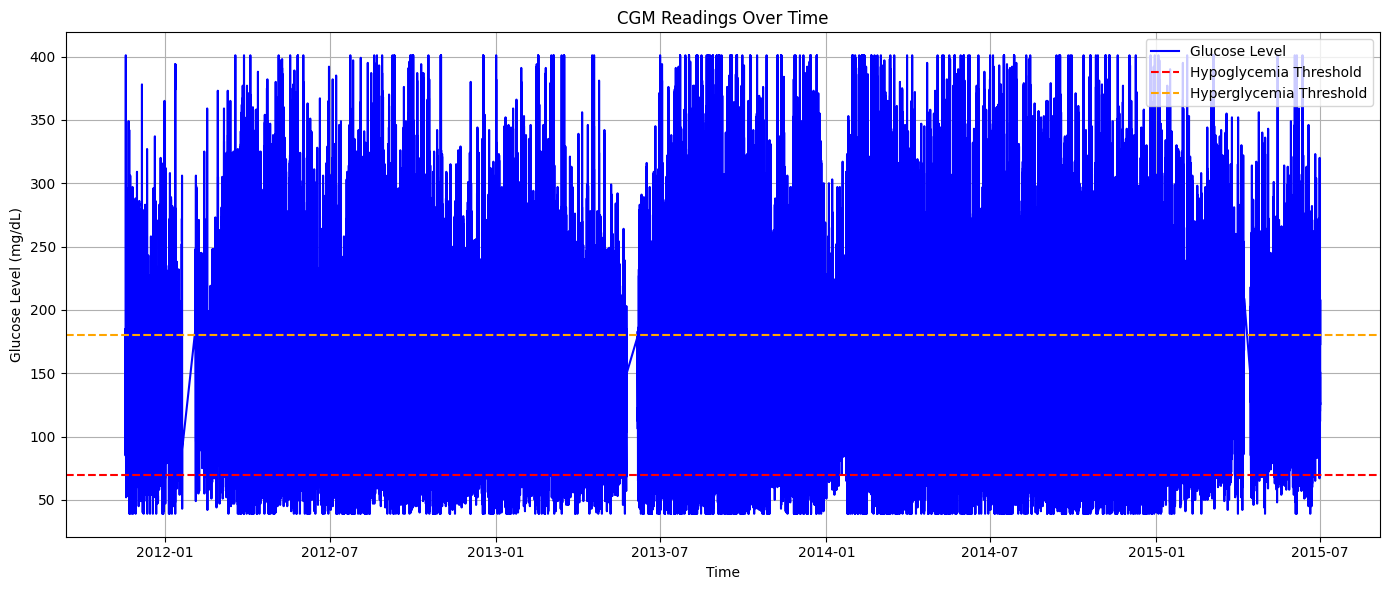

In [47]:
# Convert InternalTime to datetime
combined_data['InternalTime'] = pd.to_datetime(combined_data['InternalTime'])

# Sort by time
data = combined_data.sort_values('InternalTime')

plt.figure(figsize=(14, 6))
plt.plot(data['InternalTime'], data['CGM'], label='Glucose Level', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Hypoglycemia Threshold')
plt.axhline(180, color='orange', linestyle='--', label='Hyperglycemia Threshold')
plt.title('CGM Readings Over Time')
plt.xlabel('Time')
plt.ylabel('Glucose Level (mg/dL)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


visualize the glucose readings overtime also seeing the threshold of the data if it is workable to make the alerts here or adjust it

# **feature engineering**

In [48]:
#to add a column for the rate of change of glucose
data['RateOfChange'] = data['CGM'].diff()


In [49]:
#for future detection
data['RollingMean'] = data['CGM'].rolling(window=5).mean()
data['RollingStd'] = data['CGM'].rolling(window=5).std()


In [50]:
#can detect routine patterns
data['Hour'] = data['InternalTime'].dt.hour
data['DayOfWeek'] = data['InternalTime'].dt.dayofweek


# **building model 2 using xgboost**


In [51]:
# Predict 6 steps (30 minutes) into the future
data['Future_CGM'] = data['CGM'].shift(-6)
data = data.dropna().reset_index(drop=True)


In [52]:
# Predict 6 steps (30 minutes) into the future
data['Future_CGM'] = data['CGM'].shift(-6)
data = data.dropna().reset_index(drop=True)


In [53]:
from sklearn.model_selection import train_test_split

features = ['CGM', 'RateOfChange', 'RollingMean', 'RollingStd', 'Hour', 'DayOfWeek']
X = data[features]
y = data['Future_CGM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [54]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = XGBRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 2021.93
R² Score: 0.32


Mean Squared Error  This measures average squared error between predicted and actual glucose levels. For CGM values in the range of 50–400, it’s acceptable for an initial model.

R² Score (0.32) → Your model explains 32% of the variance in the future glucose levels. 

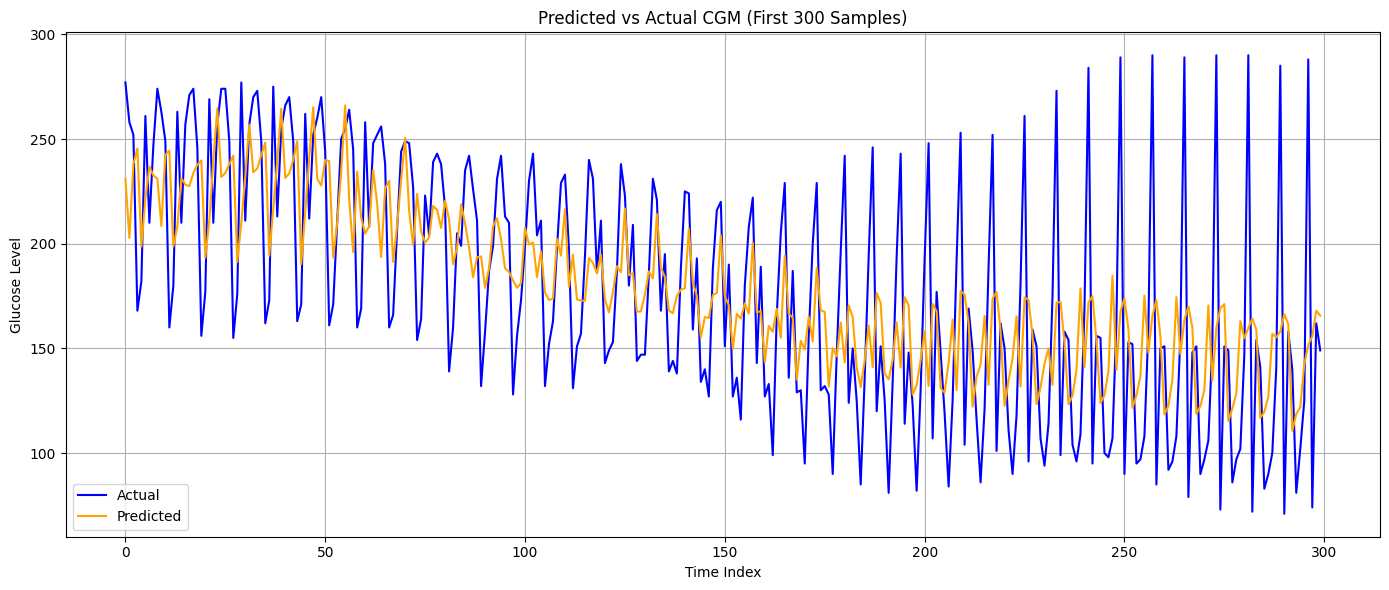

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_test.values[:300], label='Actual', color='blue')
plt.plot(y_pred[:300], label='Predicted', color='orange')
plt.title('Predicted vs Actual CGM (First 300 Samples)')
plt.xlabel('Time Index')
plt.ylabel('Glucose Level')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **building model using lstm**

In [56]:
import numpy as np

def create_sequences(data, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Drop NaNs
glucose_series = data['CGM'].dropna().values

# Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
glucose_scaled = scaler.fit_transform(glucose_series.reshape(-1, 1)).flatten()

# Create sequences
window_size = 10
X, y = create_sequences(glucose_scaled, window_size)

# Reshape for LSTM [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))


In [57]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [58]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [59]:
!pip show tensorflow


Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing-extensions, wrapt
Required-by: 


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
13027/13027 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - loss: 0.0129 - val_loss: 0.0093
Epoch 2/10
13027/13027 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.0064 - val_loss: 0.0062
Epoch 3/10
13027/13027 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.0047 - val_loss: 0.0057
Epoch 4/10
13027/13027 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.0040 - val_loss: 0.0047
Epoch 5/10
13027/13027 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.0036 - val_loss: 0.0047
Epoch 6/10
13027/13027 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.0033 - val_loss: 0.0041
Epoch 7/10
13027/13027 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - loss: 0.0032 - val_loss: 0.0042
Epoch 8/10
13027/13027 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - loss: 0.0030 - val_loss: 0.0039
Epoch 9/10
13027/13027 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - loss: 0.0030 - val_loss: 0.0038
Epoch 10/10
13027/13027 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.0029 - val_loss: 0.0038


LSTM layer with 50 units → captures temporal patterns in your data.

Dense layer → gives the final prediction (likely a single value like glucose level).

Trainable parameters: ~10k → lightweight model, great for real-time or embedded deployment.



In [61]:
y_pred = model.predict(X_test)


8142/8142 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


In [62]:
# In case you used a scaler
y_pred = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


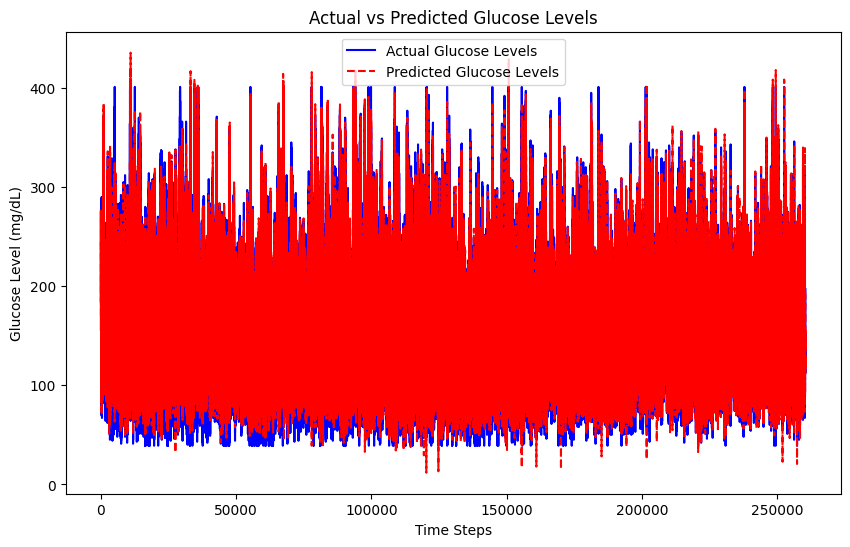

In [63]:
import matplotlib.pyplot as plt

# Plot actual vs predicted glucose values
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Glucose Levels', color='blue')
plt.plot(y_pred, label='Predicted Glucose Levels', color='red', linestyle='--')
plt.title('Actual vs Predicted Glucose Levels')
plt.xlabel('Time Steps')
plt.ylabel('Glucose Level (mg/dL)')
plt.legend()
plt.show()


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# MAE and RMSE
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 13.193353478539786
RMSE: 22.868690551049998


In [67]:
import pygame
import numpy as np
import time

# Initialize pygame mixer for sound
pygame.mixer.init()

# Define alert tones (frequencies)
hypo_alert_tone = 440  
hyper_alert_tone = 880  
normal_alert_tone = 523  

# Function to create a sine wave sound
def generate_tone(frequency, duration=0.5, sample_rate=44100):
    t = np.linspace(0, duration, int(sample_rate * duration))  
    tone = np.sin(2 * np.pi * frequency * t)  
 
    tone = np.int16(tone * 32767)
   
    stereo_tone = np.stack((tone, tone), axis=-1) 
    sound = pygame.sndarray.make_sound(stereo_tone)  
    return sound

def play_tone(frequency, duration=0.5):
    sound = generate_tone(frequency, duration)
    sound.play()
    time.sleep(duration)  

def glucose_alert(predictions):
    for i, pred in enumerate(predictions):
        if pred < 70:
            print(f"Time Step {i}: WARNING! Hypoglycemia risk - Predicted Glucose: {pred} mg/dL")
            play_tone(hypo_alert_tone) 
        elif pred > 180:
            print(f"Time Step {i}: ALERT! Hyperglycemia risk - Predicted Glucose: {pred} mg/dL")
            play_tone(hyper_alert_tone)  
        else:
            print(f"Time Step {i}: Normal - Predicted Glucose: {pred} mg/dL")
            play_tone(normal_alert_tone)  

# Sample
predictions = [68, 185, 120, 45, 195, 80]
glucose_alert(predictions)



pygame 2.6.1 (SDL 2.28.4, Python 3.12.10)
Hello from the pygame community. https://www.pygame.org/contribute.html
Time Step 0: WARNING! Hypoglycemia risk - Predicted Glucose: 68 mg/dL
Time Step 1: ALERT! Hyperglycemia risk - Predicted Glucose: 185 mg/dL
Time Step 2: Normal - Predicted Glucose: 120 mg/dL
Time Step 3: WARNING! Hypoglycemia risk - Predicted Glucose: 45 mg/dL
Time Step 4: ALERT! Hyperglycemia risk - Predicted Glucose: 195 mg/dL
Time Step 5: Normal - Predicted Glucose: 80 mg/dL


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    "Predicted Glucose": y_pred.flatten(),
    "Alert": alerts
})

print(results_df.head())


   Predicted Glucose               Alert
0         251.623566  Hyperglycemia Risk
1         218.665344  Hyperglycemia Risk
2         186.013901  Hyperglycemia Risk
3         227.731323  Hyperglycemia Risk
4         228.559021  Hyperglycemia Risk


# **personalized threshold**

In [65]:

def personalize_thresholds(user_data):
    # Example user data (could be historical glucose readings)
    hypo_threshold = user_data.get('hypo_threshold', 70)  
    hyper_threshold = user_data.get('hyper_threshold', 180)  
    
    return hypo_threshold, hyper_threshold

# Example user data with personalized thresholds
user_data = {
    'hypo_threshold': 65,  
    'hyper_threshold': 190 
}

# Call the function to get personalized thresholds
hypo_threshold, hyper_threshold = personalize_thresholds(user_data)
print(f"Personalized Hypoglycemia Threshold: {hypo_threshold} mg/dL")
print(f"Personalized Hyperglycemia Threshold: {hyper_threshold} mg/dL")


Personalized Hypoglycemia Threshold: 65 mg/dL
Personalized Hyperglycemia Threshold: 190 mg/dL


In [ ]:
# Updated glucose alert function using personalized thresholds
def glucose_alert(predictions, hypo_threshold=70, hyper_threshold=180):
    for i, pred in enumerate(predictions):
        if pred < hypo_threshold:
            print(f"Time Step {i}: WARNING! Hypoglycemia risk - Predicted Glucose: {pred} mg/dL")
            play_tone(hypo_alert_tone)
        elif pred > hyper_threshold:
            print(f"Time Step {i}: ALERT! Hyperglycemia risk - Predicted Glucose: {pred} mg/dL")
            play_tone(hyper_alert_tone) 
        else:
            print(f"Time Step {i}: Normal - Predicted Glucose: {pred} mg/dL")
            play_tone(normal_alert_tone)  
glucose_alert(predictions, hypo_threshold=hypo_threshold, hyper_threshold=hyper_threshold)


Time Step 0: Normal - Predicted Glucose: 68 mg/dL
Time Step 1: Normal - Predicted Glucose: 185 mg/dL
Time Step 2: Normal - Predicted Glucose: 120 mg/dL
Time Step 3: WARNING! Hypoglycemia risk - Predicted Glucose: 45 mg/dL


KeyboardInterrupt: 

# **anomaly detection**

In [69]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Example data (glucose and heart rate readings)
data = np.array([
    [68, 60],  
    [185, 70],  
    [120, 85],  
    [45, 55],  
    [195, 110],  
    [80, 60],  
])

# Create Isolation Forest model
model = IsolationForest(contamination=0.2)  

model.fit(data)

# Predict anomalies (1 = normal, -1 = anomaly)
anomalies = model.predict(data)

# Output results
for i, prediction in enumerate(anomalies):
    if prediction == -1:
        print(f"Time Step {i}: Anomaly detected! Potential emergency.")
    else:
        print(f"Time Step {i}: Normal reading.")


Time Step 0: Normal reading.
Time Step 1: Normal reading.
Time Step 2: Normal reading.
Time Step 3: Normal reading.
Time Step 4: Anomaly detected! Potential emergency.
Time Step 5: Normal reading.


In [ ]:
import tkinter as tk
from tkinter import messagebox

# Initialize the Tkinter window
root = tk.Tk()
root.title("Diabetes Alert System")

# Function to show alert
def show_alert(message):
    messagebox.showinfo("Alert", message)

# Function to handle glucose levels
def check_glucose():
    glucose_level = float(entry.get())
    if glucose_level < hypo_threshold:
        show_alert(f"WARNING! Hypoglycemia risk - Predicted Glucose: {glucose_level} mg/dL")
    elif glucose_level > hyper_threshold:
        show_alert(f"ALERT! Hyperglycemia risk - Predicted Glucose: {glucose_level} mg/dL")
    else:
        show_alert(f"Normal glucose level - {glucose_level} mg/dL")

# Create entry field for glucose level
entry_label = tk.Label(root, text="Enter Glucose Level (mg/dL):")
entry_label.pack()

entry = tk.Entry(root)
entry.pack()

# Create button to check glucose level
check_button = tk.Button(root, text="Check Glucose", command=check_glucose)
check_button.pack()

# Run the Tkinter event loop
root.mainloop()


In [66]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [68]:
from tensorflow.keras.models import load_model
import joblib

# Save the LSTM model
model.save("glucose_lstm_model.h5")

# Save the scaler
joblib.dump(scaler, "glucose_scaler.pkl")


['glucose_scaler.pkl']